In [ ]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from numpy.linalg import det, inv
from math import sqrt, pi
import scipy.io
import matplotlib.pyplot as plt
import pickle
import sys



In [ ]:
def ldaLearn(X, y):

    class_labels = np.unique(y)
    d = X.shape[1]
    k = len(class_labels)

    means = np.zeros((d, k))

    for i, label in enumerate(class_labels):
        class_data = X[y.flatten() == label]
        means[:, i] = np.mean(class_data, axis=0)

    covmat = np.cov(X.T, bias=True)

    return means, covmat



In [ ]:
def qdaLearn(X, y):
    class_labels = np.unique(y)
    d = X.shape[1]
    k = len(class_labels)

    means = np.zeros((d, k))
    covmats = []

    for i, label in enumerate(class_labels):
        class_data = X[y.flatten() == label]
        means[:, i] = np.mean(class_data, axis=0)
        covmats.append(np.cov(class_data.T, bias=True))  # d x d for each class

    return means, covmats


In [ ]:
def ldaTest(means, covmat, Xtest, ytest):
    inv_cov = np.linalg.inv(covmat)
    k = means.shape[1]
    n = Xtest.shape[0]

    # It will  calucates result/ scores for each class
    scores = np.zeros((n, k))
    for i in range(k):
        diff = Xtest - means[:, i].reshape(1, -1)
        scores[:, i] = -0.5 * np.sum(diff @ inv_cov * diff, axis=1)

    ypred = np.argmax(scores, axis=1).reshape(-1, 1) + 1
    acc = np.mean(ypred == ytest) * 100
    return acc, ypred


In [ ]:
def qdaTest(means, covmats, Xtest, ytest):
    k = means.shape[1]
    n = Xtest.shape[0]

    scores = np.zeros((n, k))
    for i in range(k):
        diff = Xtest - means[:, i].reshape(1, -1)
        inv_cov = np.linalg.inv(covmats[i])
        det_cov = np.linalg.det(covmats[i])
        scores[:, i] = -0.5 * np.sum(diff @ inv_cov * diff, axis=1) - 0.5 * np.log(det_cov + 1e-6)

    ypred = np.argmax(scores, axis=1).reshape(-1, 1) + 1
    acc = np.mean(ypred == ytest) * 100
    return acc, ypred

In [ ]:
def learnOLERegression(X,y):
    # Inputs:
    # X = N x d
    # y = N x 1
    # Output:
    # w = d x 1

    # IMPLEMENT THIS METHOD
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

In [ ]:
def learnRidgeRegression(X, y, lambd):
    # Inputs:
    # X - N x d matrix (N examples, d features)
    # y - N x 1 vector of target values
    # lambd - scalar regularization parameter
    #
    # Output:
    # w - d x 1 weight vector (ridge regression weights)

    I = np.identity(X.shape[1])  # Identity matrix of size d x d
    w = np.linalg.inv(X.T @ X + lambd * I) @ X.T @ y
    return w

In [ ]:
def testOLERegression(w, Xtest, ytest):
    # Inputs:
    # w - d x 1 weight vector
    # Xtest - N x d test input matrix
    # ytest - N x 1 true output vector
    #
    # Output:
    # mse - scalar Mean Squared Error on test data

    y_pred = Xtest @ w
    mse = np.mean((ytest - y_pred) ** 2)
    return mse


In [ ]:
def regressionObjVal(w, X, y, lambd):
    # Inputs:
    # w - weight vector flattened (d,)
    # X - N x d input matrix
    # y - N x 1 output vector
    # lambd - regularization parameter
    #
    # Outputs:
    # error - scalar regularized loss value
    # error_grad - gradient of error w.r.t. w (flattened)

    w = w.reshape(-1, 1)  # Convert to column vector
    error = 0.5 * np.sum((y - X @ w) ** 2) + 0.5 * lambd * np.sum(w ** 2)
    error_grad = -X.T @ (y - X @ w) + lambd * w
    return error, error_grad.flatten()


In [ ]:
def mapNonLinear(x, p):
    # Inputs:
    # x - N x 1 column vector (single feature)
    # p - highest power to expand to (integer >= 0)
    #
    # Output:
    # Xp - N x (p+1) matrix [1, x, x^2, ..., x^p]

    N = x.shape[0]
    Xp = np.ones((N, p + 1))
    for i in range(1, p + 1):
        Xp[:, i] = x[:, 0] ** i
    return Xp


MAIN SCRIPT PLUS PROBLEM 1.
Problem 1: Experiment with Gaussian Discriminators

Implement Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis
(QDA). Implement two functions in Python: ldaLearn and qdaLearn which take a training data
1
set (a feature matrix and labels) and return the means and covariance matrix (or matrices).

Implement two functions ldaTest and qdaTest which return the true labels for a given test
data set and the accuracy using the true labels for the test data. The format of arguments and
the outputs is provided in the base code.

In [ ]:
# Main script

# Problem 1
# load the sample data
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'),encoding = 'latin1')



In [ ]:
# LDA
means,covmat = ldaLearn(X,y)
ldaacc,ldares = ldaTest(means,covmat,Xtest,ytest)
print('LDA Accuracy = '+str(ldaacc))
# QDA
means,covmats = qdaLearn(X,y)
qdaacc,qdares = qdaTest(means,covmats,Xtest,ytest)
print('QDA Accuracy = '+str(qdaacc))



LDA Accuracy = 97.0
QDA Accuracy = 96.0


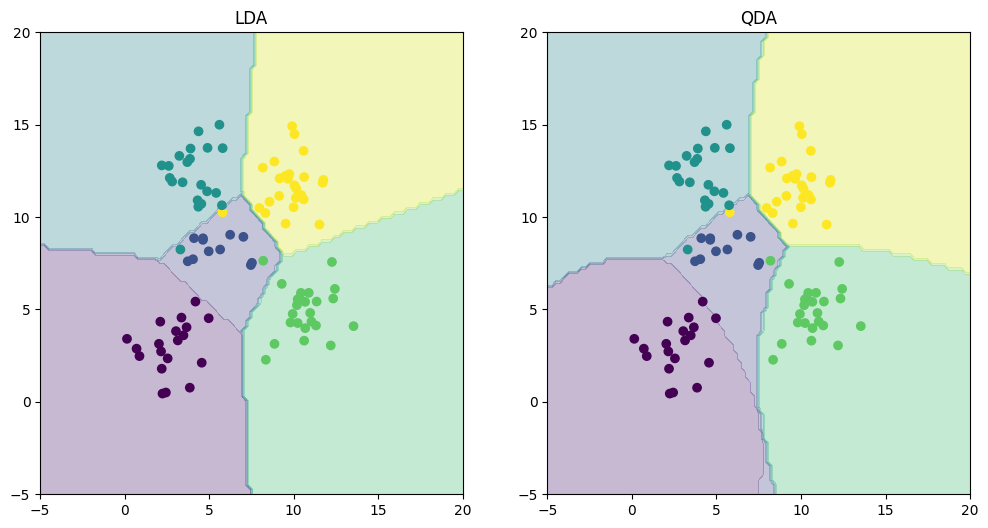

In [ ]:
# plotting boundaries
x1 = np.linspace(-5,20,100)
x2 = np.linspace(-5,20,100)
xx1,xx2 = np.meshgrid(x1,x2)
xx = np.zeros((x1.shape[0]*x2.shape[0],2))
xx[:,0] = xx1.ravel()
xx[:,1] = xx2.ravel()

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)

zacc,zldares = ldaTest(means,covmat,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zldares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest)
plt.title('LDA')

plt.subplot(1, 2, 2)

zacc,zqdares = qdaTest(means,covmats,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zqdares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest)
plt.title('QDA')

plt.show()

PROBLEM -2

In [ ]:
# Problem 2
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding = 'latin1')

# add intercept
X_i = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(X,y)
mle = testOLERegression(w,Xtest,ytest)

w_i = learnOLERegression(X_i,y)
mle_i = testOLERegression(w_i,Xtest_i,ytest)

print('MSE without intercept '+str(mle))
print('MSE with intercept '+str(mle_i))

MSE without intercept 106775.36156418786
MSE with intercept 3707.8401812458424


PROBLEM -3


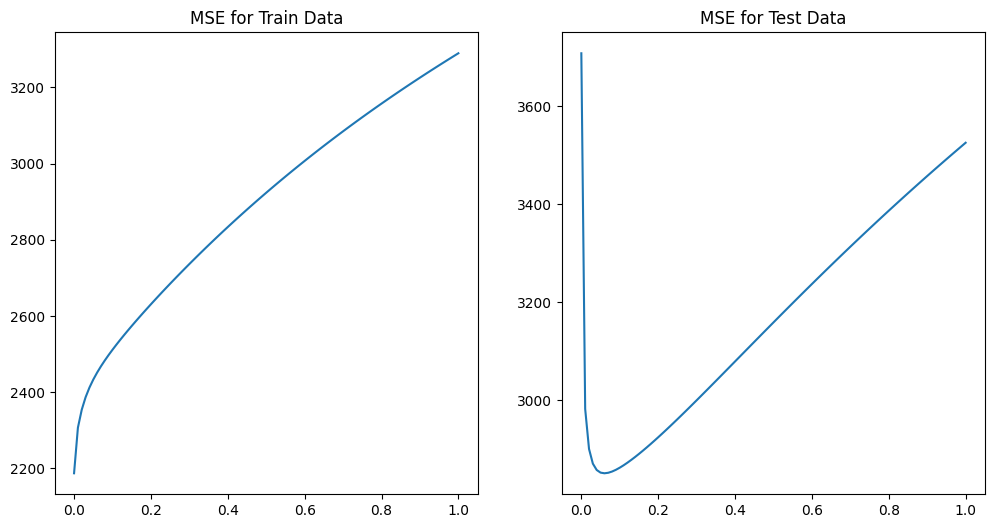

In [ ]:

# Problem 3
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses3_train = np.zeros((k,1))
mses3 = np.zeros((k,1))
for lambd in lambdas:
    w_l = learnRidgeRegression(X_i,y,lambd)
    mses3_train[i] = testOLERegression(w_l,X_i,y)
    mses3[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.subplot(1, 2, 2)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')

plt.show()


PROBLEM 4

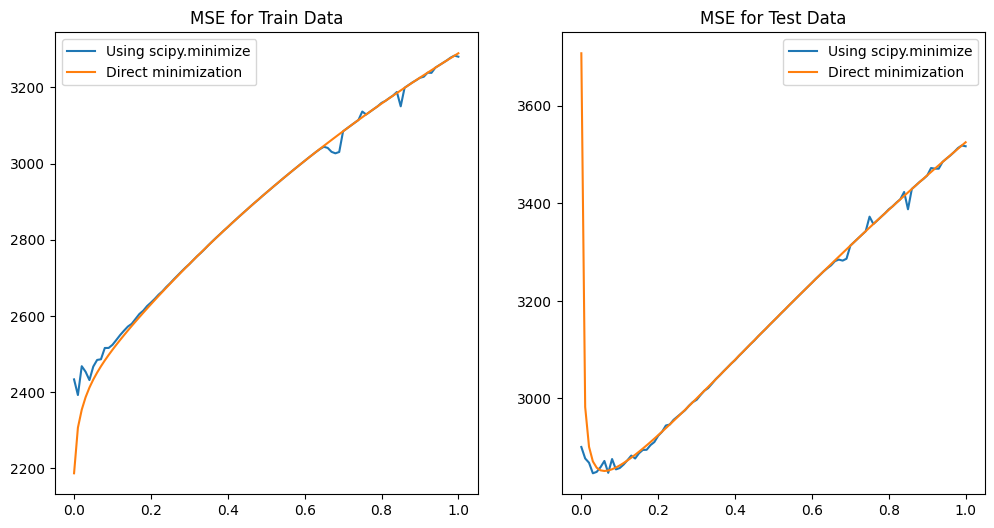

In [ ]:
# Problem 4
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses4_train = np.zeros((k,1))
mses4 = np.zeros((k,1))
opts = {'maxiter' : 20}    # Preferred value.
w_init = np.ones(X_i.shape[1]) # Changed to a 1D array
for lambd in lambdas:
    args = (X_i, y, lambd)
    w_l = minimize(regressionObjVal, w_init, jac=True, args=args,method='CG', options=opts)
    w_l = np.transpose(np.array(w_l.x))
    w_l = np.reshape(w_l,[len(w_l),1])
    mses4_train[i] = testOLERegression(w_l,X_i,y)
    mses4[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses4_train)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.legend(['Using scipy.minimize','Direct minimization'])

plt.subplot(1, 2, 2)
plt.plot(lambdas,mses4)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')
plt.legend(['Using scipy.minimize','Direct minimization'])
plt.show()

PROBLEM 5


In [2]:
# Problem 5
pmax = 7
lambda_opt = 0 # REPLACE THIS WITH lambda_opt estimated from Problem 3
mses5_train = np.zeros((pmax,2))
mses5 = np.zeros((pmax,2))
for p in range(pmax):
    Xd = mapNonLinear(X[:,2],p)
    Xdtest = mapNonLinear(Xtest[:,2],p)
    w_d1 = learnRidgeRegression(Xd,y,0)
    mses5_train[p,0] = testOLERegression(w_d1,Xd,y)
    mses5[p,0] = testOLERegression(w_d1,Xdtest,ytest)
    w_d2 = learnRidgeRegression(Xd,y,lambda_opt)
    mses5_train[p,1] = testOLERegression(w_d2,Xd,y)
    mses5[p,1] = testOLERegression(w_d2,Xdtest,ytest)

  fig = plt.figure(figsize=[12,6])
  plt.subplot(1, 2, 1)
  plt.plot(range(pmax),mses5_train)
  plt.title('MSE for Train Data')
  plt.legend(('No Regularization','Regularization'))
  plt.subplot(1, 2, 2)
  plt.plot(range(pmax),mses5)
  plt.title('MSE for Test Data')
  plt.legend(('No Regularization','Regularization'))
  plt.show()


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 16)

In [ ]:
pmax = 7
lambda_opt = 0.1  # <-- REPLACE with your optimal lambda from Problem 3

mses5_train = np.zeros((pmax, 2))
mses5_test = np.zeros((pmax, 2))

for p in range(pmax):
    # Polynomial feature mapping
    Xd = mapNonLinear(X[:, 2], p)
    Xdtest = mapNonLinear(Xtest[:, 2], p)

    # Ridge Regression with no regularization (λ=0)
    w_d1 = learnRidgeRegression(Xd, y, 0)
    mses5_train[p, 0] = testOLERegression(w_d1, Xd, y)
    mses5_test[p, 0] = testOLERegression(w_d1, Xdtest, ytest)

    # Ridge Regression with optimal λ
    w_d2 = learnRidgeRegression(Xd, y, lambda_opt)
    mses5_train[p, 1] = testOLERegression(w_d2, Xd, y)
    mses5_test[p, 1] = testOLERegression(w_d2, Xdtest, ytest)

# Plotting (outside the loop!)
fig = plt.figure(figsize=[12, 6])

plt.subplot(1, 2, 1)
plt.plot(range(pmax), mses5_train[:,0], 'o-', label='No Regularization (λ=0)')
plt.plot(range(pmax), mses5_train[:,1], 's-', label=f'Regularization (λ={lambda_opt})')
plt.xlabel('Polynomial Degree (p)')
plt.ylabel('Training MSE')
plt.title('MSE for Train Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(pmax), mses5_test[:,0], 'o-', label='No Regularization (λ=0)')
plt.plot(range(pmax), mses5_test[:,1], 's-', label=f'Regularization (λ={lambda_opt})')
plt.xlabel('Polynomial Degree (p)')
plt.ylabel('Testing MSE')
plt.title('MSE for Test Data')
plt.legend()

plt.tight_layout()
plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed